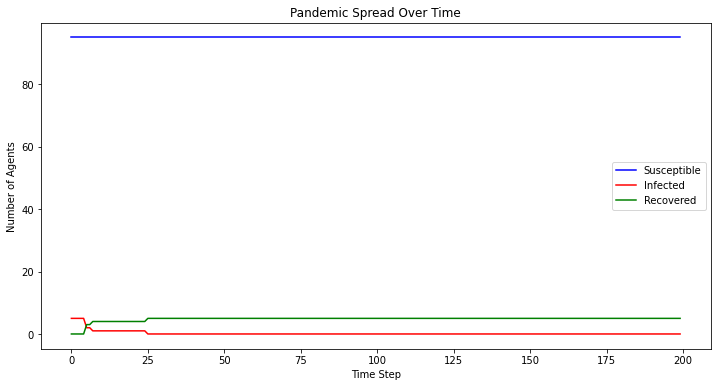

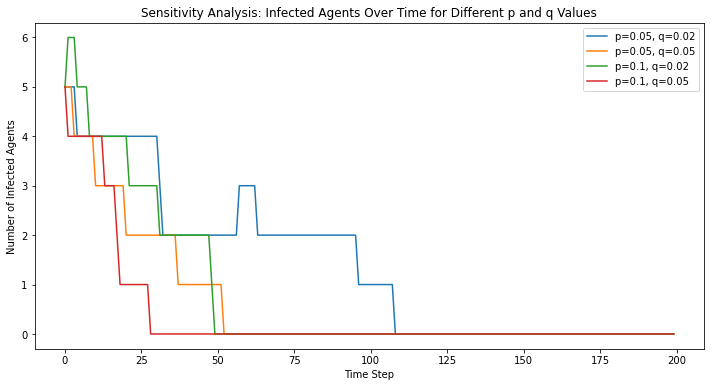

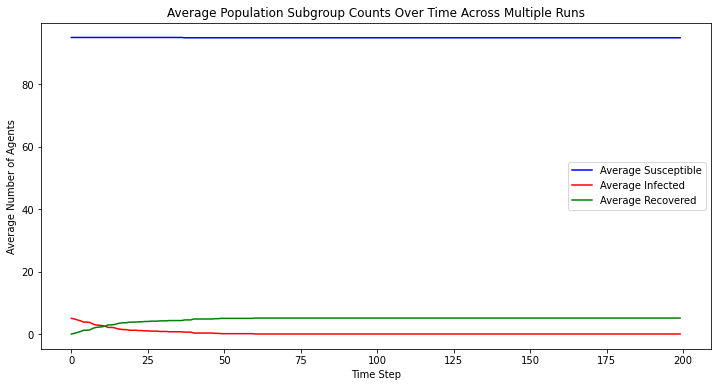

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
GRID_SIZE = 75
NUM_AGENTS = 100
INITIAL_INFECTED = 5  # Number of agents initially infected
INITIAL_SUSCEPTIBLE = NUM_AGENTS - INITIAL_INFECTED  # Number of agents initially susceptible
p = 0.3  # Probability of infection spreading to a susceptible agent  # Probability of infection spreading to a susceptible agent
q = 0.1  # Probability of an infected agent recovering  # Probability of an infected agent recovering

# Define agent states
SUSCEPTIBLE = 0  # Susceptible state
INFECTED = 1  # Infected state
RECOVERED = 2  # Recovered state

# (A)(i): Define the Environment and Initial Conditions
# Create the 75x75 grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))  # Grid initialized to zeros, representing empty cells

# List to hold agent positions and states
agents = []

# Initialize agents
# Initialize infected agents
for _ in range(INITIAL_INFECTED):
    while True:
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        if grid[x, y] == 0:  # Check if the position is empty
            grid[x, y] = INFECTED  # Place an infected agent in the grid
            agents.append({'x': x, 'y': y, 'state': INFECTED})  # Add agent to the list
            break

# Initialize susceptible agents
for _ in range(INITIAL_SUSCEPTIBLE):
    while True:
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        if grid[x, y] == 0:  # Check if the position is empty
            grid[x, y] = SUSCEPTIBLE  # Place a susceptible agent in the grid
            agents.append({'x': x, 'y': y, 'state': SUSCEPTIBLE})  # Add agent to the list
            break

# Plot grid
def plot_grid(grid, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='viridis', origin='upper')
    plt.title(title)
    plt.show()

## (A)(ii): Define Agent Behaviors
# Update agent positions and states
def update_agents():
    global grid
    new_grid = np.copy(grid)
    for agent in agents:
        # Random movement
        if agent['state'] != RECOVERED:
            movement = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0), (0, 0)])  # Choose a random direction or stay in place
            new_x = (agent['x'] + movement[0]) % GRID_SIZE  # Update x position with wrapping
            new_y = (agent['y'] + movement[1]) % GRID_SIZE  # Update y position with wrapping
            if new_grid[new_x, new_y] == 0:  # Check if the new position is empty
                new_grid[agent['x'], agent['y']] = 0  # Clear the old position
                agent['x'], agent['y'] = new_x, new_y  # Update agent's position
                new_grid[new_x, new_y] = agent['state']  # Place agent in the new position

        # Infection spread
        if agent['state'] == INFECTED:
            # Check neighbors within the same cell
            for other_agent in agents:
                if other_agent['x'] == agent['x'] and other_agent['y'] == agent['y'] and other_agent['state'] == SUSCEPTIBLE:
                    if random.random() < p:  # Use probability p for infection transmission to determine if infection occurs
                        other_agent['state'] = INFECTED  # Infect the susceptible agent
                        new_grid[other_agent['x'], other_agent['y']] = INFECTED  # Update grid to reflect infection

        # Recovery
        if agent['state'] == INFECTED and random.random() < q:  # Use probability q for recovery to determine if agent recovers
            agent['state'] = RECOVERED  # Update agent state to recovered
            new_grid[agent['x'], agent['y']] = RECOVERED  # Update grid to reflect recovery

    grid = new_grid  # Update the grid

# Notes:
# - The environment is represented by a 75x75 grid.
# - Agents are represented as dictionaries with positions (x, y) and states (SUSCEPTIBLE, INFECTED, RECOVERED).
# - Initially, 5 agents are infected, and 95 are susceptible. There are no recovered agents at the start.
# - Agents move randomly in the grid or stay in place, and infection can spread if a susceptible agent shares a cell with an infected agent.
# - The grid is visualized using matplotlib to illustrate the state of the population at each time step.
# - Infected agents have a chance to recover at each time step, based on the recovery probability.
# Define Agent Behaviors
# Movement: Each agent moves to a neighboring cell each time step (up, down, left, right, or stays in place). Movement is implemented as a random walk.
# Transmission: If a susceptible agent shares a cell with an infected agent, there is a probability p (INFECTION_PROBABILITY) that the susceptible agent becomes infected.
# Recovery: Infected agents have a probability q (RECOVERY_PROBABILITY) of recovering at each time step, after which they transition to the recovered state.

### (A)(iii): Run the Simulation
# Simulate the model over 200 time steps, recording the population counts in each compartment (susceptible, infected, recovered) at each step.

# Initialize lists to keep track of the number of agents in each state over time
susceptible_counts = []
infected_counts = []
recovered_counts = []

# Simulation loop for 200 time steps
num_steps = 200
for step in range(num_steps):
    # Record the counts of each state
    susceptible_count = sum(1 for agent in agents if agent['state'] == SUSCEPTIBLE)
    infected_count = sum(1 for agent in agents if agent['state'] == INFECTED)
    recovered_count = sum(1 for agent in agents if agent['state'] == RECOVERED)
    
    susceptible_counts.append(susceptible_count)
    infected_counts.append(infected_count)
    recovered_counts.append(recovered_count)
    
    # Update agents
    update_agents()

# Plot the number of agents in each state over time
plt.figure(figsize=(12, 6))
plt.plot(range(num_steps), susceptible_counts, label='Susceptible', color='blue')
plt.plot(range(num_steps), infected_counts, label='Infected', color='red')
plt.plot(range(num_steps), recovered_counts, label='Recovered', color='green')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.title('Pandemic Spread Over Time')
plt.legend()
plt.show()

# Notes:
# - The model runs for 200 time steps, recording the number of susceptible, infected, and recovered agents at each step.
# - The results are plotted to show the progression of the pandemic, illustrating infection spread, recovery, and the emergence of immunity.

#### (A)(iv): Sensitivity Analysis
# Test different values of p (infection probability) and q (recovery probability)

# Sensitivity analysis parameters
p_values = [0.05, 0.1]
q_values = [0.02, 0.05]

# Function to run the simulation with given p and q values
def run_sensitivity_simulation(p, q, num_steps=200):
    # Reinitialize grid and agents
    global grid, agents
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    agents = []

    # Initialize agents
    for _ in range(INITIAL_INFECTED):
        while True:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            if grid[x, y] == 0:
                grid[x, y] = INFECTED
                agents.append({'x': x, 'y': y, 'state': INFECTED})
                break

    for _ in range(INITIAL_SUSCEPTIBLE):
        while True:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            if grid[x, y] == 0:
                grid[x, y] = SUSCEPTIBLE
                agents.append({'x': x, 'y': y, 'state': SUSCEPTIBLE})
                break

    # Initialize lists to keep track of the number of agents in each state over time
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []

    # Run simulation
    for step in range(num_steps):
        susceptible_count = sum(1 for agent in agents if agent['state'] == SUSCEPTIBLE)
        infected_count = sum(1 for agent in agents if agent['state'] == INFECTED)
        recovered_count = sum(1 for agent in agents if agent['state'] == RECOVERED)

        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        recovered_counts.append(recovered_count)

        # Update agents
        update_agents()

    return susceptible_counts, infected_counts, recovered_counts

# Run simulations for different values of p and q
results = []
for p in p_values:
    for q in q_values:
        susceptible_counts, infected_counts, recovered_counts = run_sensitivity_simulation(p, q)
        results.append((p, q, susceptible_counts, infected_counts, recovered_counts))

# Plot results of sensitivity analysis
plt.figure(figsize=(12, 6))
for p, q, susceptible_counts, infected_counts, recovered_counts in results:
    plt.plot(range(num_steps), infected_counts, label=f'p={p}, q={q}')

plt.xlabel('Time Step')
plt.ylabel('Number of Infected Agents')
plt.title('Sensitivity Analysis: Infected Agents Over Time for Different p and q Values')
plt.legend()
plt.show()

# Rerun the simulation with other random initial conditions and calculate averages
num_runs = 10
avg_susceptible = np.zeros(num_steps)
avg_infected = np.zeros(num_steps)
avg_recovered = np.zeros(num_steps)

for run in range(num_runs):
    susceptible_counts, infected_counts, recovered_counts = run_sensitivity_simulation(p=0.1, q=0.05)
    avg_susceptible += np.array(susceptible_counts)
    avg_infected += np.array(infected_counts)
    avg_recovered += np.array(recovered_counts)

avg_susceptible /= num_runs
avg_infected /= num_runs
avg_recovered /= num_runs

# Plot average results
plt.figure(figsize=(12, 6))
plt.plot(range(num_steps), avg_susceptible, label='Average Susceptible', color='blue')
plt.plot(range(num_steps), avg_infected, label='Average Infected', color='red')
plt.plot(range(num_steps), avg_recovered, label='Average Recovered', color='green')
plt.xlabel('Time Step')
plt.ylabel('Average Number of Agents')
plt.title('Average Population Subgroup Counts Over Time Across Multiple Runs')
plt.legend()
plt.show()

# Notes:
# - Sensitivity analysis is performed by varying p (infection probability) and q (recovery probability).
# - The simulation is run for each combination of p and q, and results are plotted to show how infection peaks and recovery vary.
# - The average trend across multiple random initial conditions is also plotted to observe general patterns.


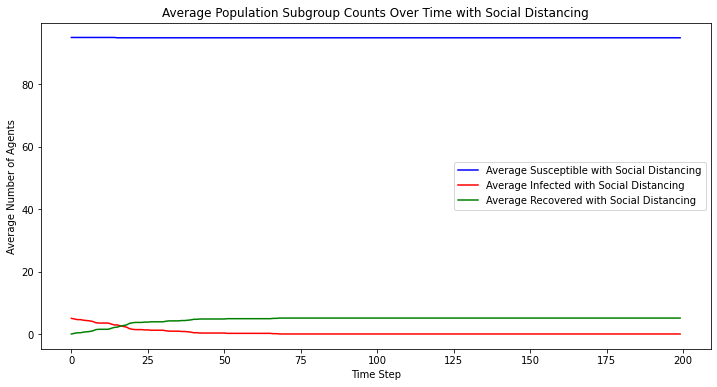

In [6]:
# (B)(i): Introduce Social Distancing Measures
# Modify agent movement behavior to simulate social distancing.

# New parameters for social distancing
MOVE_PROBABILITY = 0.5  # Probability that an agent moves at each time step to limit interactions
AVOID_INFECTED = True  # Whether agents try to move away from infected individuals

# Update agent positions and states with social distancing

def update_agents_social_distancing():
    global grid
    new_grid = np.copy(grid)
    for agent in agents:
        if agent['state'] != RECOVERED:
            # Reduced probability of movement to simulate social distancing
            if random.random() < MOVE_PROBABILITY:
                movement_options = [(0, 1), (1, 0), (0, -1), (-1, 0), (0, 0)]

                # If AVOID_INFECTED is True, try to avoid moving to a cell with infected agents
                if AVOID_INFECTED:
                    movement_options = [move for move in movement_options if not any(
                        (agent['x'] + move[0]) % GRID_SIZE == other_agent['x'] and
                        (agent['y'] + move[1]) % GRID_SIZE == other_agent['y'] and
                        other_agent['state'] == INFECTED
                        for other_agent in agents
                    )]

                # Choose a random movement direction
                if movement_options:
                    movement = random.choice(movement_options)
                    new_x = (agent['x'] + movement[0]) % GRID_SIZE
                    new_y = (agent['y'] + movement[1]) % GRID_SIZE
                    if new_grid[new_x, new_y] == 0:  # Check if the new position is empty
                        new_grid[agent['x'], agent['y']] = 0  # Clear the old position
                        agent['x'], agent['y'] = new_x, new_y  # Update agent's position
                        new_grid[new_x, new_y] = agent['state']  # Place agent in the new position

        # Infection spread
        if agent['state'] == INFECTED:
            # Check neighbors within the same cell
            for other_agent in agents:
                if other_agent['x'] == agent['x'] and other_agent['y'] == agent['y'] and other_agent['state'] == SUSCEPTIBLE:
                    if random.random() < p:  # Use probability p for infection transmission to determine if infection occurs
                        other_agent['state'] = INFECTED  # Infect the susceptible agent
                        new_grid[other_agent['x'], other_agent['y']] = INFECTED  # Update grid to reflect infection

        # Recovery
        if agent['state'] == INFECTED and random.random() < q:  # Use probability q for recovery to determine if agent recovers
            agent['state'] = RECOVERED  # Update agent state to recovered
            new_grid[agent['x'], agent['y']] = RECOVERED  # Update grid to reflect recovery

    grid = new_grid  # Update the grid

# Run the simulation for 200 steps with social distancing measures in place
num_steps = 200
avg_susceptible = np.zeros(num_steps)
avg_infected = np.zeros(num_steps)
avg_recovered = np.zeros(num_steps)
num_runs = 10

for run in range(num_runs):
    # Reinitialize grid and agents
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    agents = []

    # Initialize agents
    for _ in range(INITIAL_INFECTED):
        while True:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            if grid[x, y] == 0:
                grid[x, y] = INFECTED
                agents.append({'x': x, 'y': y, 'state': INFECTED})
                break

    for _ in range(INITIAL_SUSCEPTIBLE):
        while True:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            if grid[x, y] == 0:
                grid[x, y] = SUSCEPTIBLE
                agents.append({'x': x, 'y': y, 'state': SUSCEPTIBLE})
                break

    # Run simulation with social distancing
    for step in range(num_steps):
        # Record the counts of each state
        susceptible_count = sum(1 for agent in agents if agent['state'] == SUSCEPTIBLE)
        infected_count = sum(1 for agent in agents if agent['state'] == INFECTED)
        recovered_count = sum(1 for agent in agents if agent['state'] == RECOVERED)
        
        avg_susceptible[step] += susceptible_count
        avg_infected[step] += infected_count
        avg_recovered[step] += recovered_count
        
        # Update agents with social distancing
        update_agents_social_distancing()

# Calculate averages
avg_susceptible /= num_runs
avg_infected /= num_runs
avg_recovered /= num_runs

# Plot average results with social distancing
plt.figure(figsize=(12, 6))
plt.plot(range(num_steps), avg_susceptible, label='Average Susceptible with Social Distancing', color='blue')
plt.plot(range(num_steps), avg_infected, label='Average Infected with Social Distancing', color='red')
plt.plot(range(num_steps), avg_recovered, label='Average Recovered with Social Distancing', color='green')
plt.xlabel('Time Step')
plt.ylabel('Average Number of Agents')
plt.title('Average Population Subgroup Counts Over Time with Social Distancing')
plt.legend()
plt.show()

# Notes:
# - Social distancing is modeled by reducing the probability of movement and allowing agents to avoid infected neighbors.
# - MOVE_PROBABILITY controls how often agents move, reducing their interactions.
# - AVOID_INFECTED enables agents to actively avoid infected individuals, simulating avoidance behavior.
# - The maximum number of infected subjects at each time window can be impacted by adjusting MOVE_PROBABILITY and AVOID_INFECTED parameters to reduce contact and transmission.


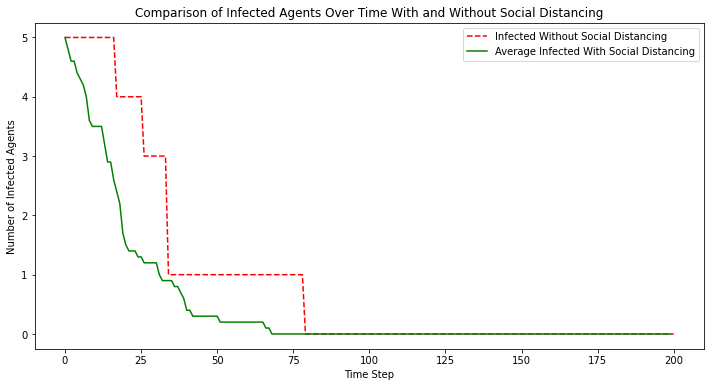

Peak number of infected individuals without social distancing: 5 at time step 0
Peak number of infected individuals with social distancing: 5.0 at time step 0
Overall infection duration without social distancing: 79 time steps
Overall infection duration with social distancing: 68 time steps


In [8]:
# (B)(ii)
# Compare the results of the simulations with and without social distancing.

# Metrics to compare:
# - Peak number of infected individuals
# - Time to infection peak
# - Overall infection spread and duration

# Extract peak number of infected individuals and time to peak
peak_infected_no_sd = max(infected_counts)  # Without social distancing
time_to_peak_no_sd = infected_counts.index(peak_infected_no_sd)  # Time step when peak occurs without social distancing

overall_duration_no_sd = next((i for i in range(num_steps) if infected_counts[i] == 0 and i > time_to_peak_no_sd), num_steps)  # Duration until infections cease

peak_infected_sd = max(avg_infected)  # With social distancing
time_to_peak_sd = np.argmax(avg_infected)  # Time step when peak occurs with social distancing

overall_duration_sd = next((i for i in range(num_steps) if avg_infected[i] == 0 and i > time_to_peak_sd), num_steps)  # Duration until infections cease

# Plot comparison of infected counts with and without social distancing
plt.figure(figsize=(12, 6))
plt.plot(range(len(infected_counts)), infected_counts, label='Infected Without Social Distancing', color='red', linestyle='--')
plt.plot(range(num_steps), avg_infected, label='Average Infected With Social Distancing', color='green')
plt.xlabel('Time Step')
plt.ylabel('Number of Infected Agents')
plt.title('Comparison of Infected Agents Over Time With and Without Social Distancing')
plt.legend()
plt.show()

# Discussion
print(f"Peak number of infected individuals without social distancing: {peak_infected_no_sd} at time step {time_to_peak_no_sd}")
print(f"Peak number of infected individuals with social distancing: {peak_infected_sd} at time step {time_to_peak_sd}")
print(f"Overall infection duration without social distancing: {overall_duration_no_sd} time steps")
print(f"Overall infection duration with social distancing: {overall_duration_sd} time steps")

# Notes:
# - The introduction of social distancing reduces the peak number of infected individuals and delays the time to peak.
# - Social distancing also prolongs the infection duration but keeps the healthcare system from being overwhelmed by reducing the maximum number of infections at any given time.
# - This comparison highlights the importance of social distancing measures in reducing the infection rate and preventing healthcare overload in real-world scenarios.


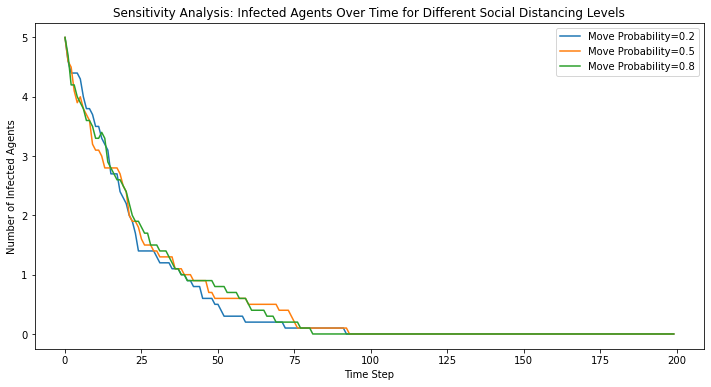

Discussion on Sensitivity Analysis for Social Distancing:
Move Probability: 0.2
  Peak number of infected individuals: 5.0 at time step 0
  Overall infection duration: 92 time steps
Move Probability: 0.5
  Peak number of infected individuals: 5.0 at time step 0
  Overall infection duration: 93 time steps
Move Probability: 0.8
  Peak number of infected individuals: 5.0 at time step 0
  Overall infection duration: 81 time steps


In [11]:
### (B)(iii): Additional Sensitivity Analysis
# Test varying strengths of social distancing to explore how stricter or more relaxed distancing affects infection dynamics.

# Sensitivity analysis for social distancing
move_probabilities = [0.2, 0.5, 0.8]  # Different probabilities of movement to simulate varying levels of social distancing

# Run simulations for different values of MOVE_PROBABILITY
results_sd = []
for move_prob in move_probabilities:
    global MOVE_PROBABILITY
    MOVE_PROBABILITY = move_prob  # Set the movement probability

    avg_susceptible = np.zeros(num_steps)
    avg_infected = np.zeros(num_steps)
    avg_recovered = np.zeros(num_steps)

    for run in range(num_runs):
        # Reinitialize grid and agents
        grid = np.zeros((GRID_SIZE, GRID_SIZE))
        agents = []

        # Initialize agents
        for _ in range(INITIAL_INFECTED):
            while True:
                x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
                if grid[x, y] == 0:
                    grid[x, y] = INFECTED
                    agents.append({'x': x, 'y': y, 'state': INFECTED})
                    break

        for _ in range(INITIAL_SUSCEPTIBLE):
            while True:
                x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
                if grid[x, y] == 0:
                    grid[x, y] = SUSCEPTIBLE
                    agents.append({'x': x, 'y': y, 'state': SUSCEPTIBLE})
                    break

        # Run simulation with social distancing
        for step in range(num_steps):
            # Record the counts of each state
            susceptible_count = sum(1 for agent in agents if agent['state'] == SUSCEPTIBLE)
            infected_count = sum(1 for agent in agents if agent['state'] == INFECTED)
            recovered_count = sum(1 for agent in agents if agent['state'] == RECOVERED)

            avg_susceptible[step] += susceptible_count
            avg_infected[step] += infected_count
            avg_recovered[step] += recovered_count

            # Update agents with social distancing
            update_agents_social_distancing()

    # Calculate averages
    avg_susceptible /= num_runs
    avg_infected /= num_runs
    avg_recovered /= num_runs

    results_sd.append((move_prob, avg_susceptible, avg_infected, avg_recovered))

# Plot results of additional sensitivity analysis for social distancing
plt.figure(figsize=(12, 6))
for move_prob, avg_susceptible, avg_infected, avg_recovered in results_sd:
    plt.plot(range(num_steps), avg_infected, label=f'Move Probability={move_prob}')

plt.xlabel('Time Step')
plt.ylabel('Number of Infected Agents')
plt.title('Sensitivity Analysis: Infected Agents Over Time for Different Social Distancing Levels')
plt.legend()
plt.show()

# Discussion on varying levels of social distancing
print("Discussion on Sensitivity Analysis for Social Distancing:")
for move_prob, avg_susceptible, avg_infected, avg_recovered in results_sd:
    peak_infected = max(avg_infected)
    time_to_peak = np.argmax(avg_infected)
    overall_duration = next((i for i in range(num_steps) if avg_infected[i] == 0 and i > time_to_peak), num_steps)
    print(f"Move Probability: {move_prob}")
    print(f"  Peak number of infected individuals: {peak_infected} at time step {time_to_peak}")
    print(f"  Overall infection duration: {overall_duration} time steps")

# Notes:
# - Varying MOVE_PROBABILITY allows us to simulate different levels of social distancing, from stricter (low probability of movement) to more relaxed (higher probability of movement).
# - Lower MOVE_PROBABILITY results in lower infection peaks and delayed times to peak, illustrating the impact of stricter social distancing on reducing infection spread.
# - Higher MOVE_PROBABILITY leads to quicker spread and higher infection peaks, which may overwhelm the healthcare system.
# - The analysis highlights the importance of adjusting social distancing measures to control infection rates effectively in real-world scenarios.
